In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.colors
cmap = plt.cm.plasma

In [2]:
# Extracting data
ThermoProperties = pd.read_csv('ThermoProperties.csv')
Benzene_Ring_Compound = ThermoProperties[ThermoProperties['name'].str.contains('benzene')]


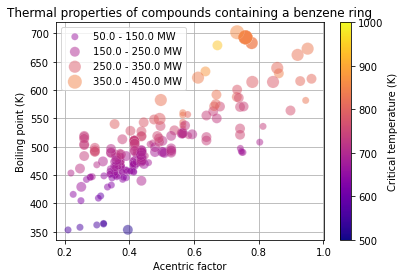

In [3]:
# Plotting
fig, ax = plt.subplots()
norm = matplotlib.colors.Normalize(vmin=500, vmax=1000)
bins = np.linspace(50, 450, 5)

# molweight min = 78.11
# molweight max = 372.68

grouped = Benzene_Ring_Compound.groupby(np.digitize(Benzene_Ring_Compound['molweight'],bins))

# Create label for each group:
sizes = [50*(i+1.) for i in range(5)]
labels = []
for i in range(len(bins)-1):
    labels.append(str(bins[i]) + ' - ' + str(bins[i+1]) + ' MW')

for i, (name, group) in enumerate(grouped):
    ax.scatter(group['acentric factor'],group['boiling point (K)'],
               s=sizes[i], label = labels[i],
               color=cmap(norm(group['critical temperature (K)'])),
               edgecolor='white',
                linewidths=0.2,           
               alpha=0.5)
ax.set_xlabel('Acentric factor')
ax.set_ylabel('Boiling point (K)')
ax.grid()
ax.set_axisbelow(True)
ax.legend()
ax.set_title('Thermal properties of compounds containing a benzene ring')
fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax,label='Critical temperature (K)')



In [4]:
fig.savefig('QualityVisual_HF_NT.png',dpi=360)